# Simple CIFAR-100 convnet

**Modified from MNIST example**<br>
**Description:** A convnet for CIFAR-100 classification.

## Setup

In [1]:
import numpy as np
import keras
from keras import layers

## Prepare the data

In [2]:
# Model / data parameters
num_classes = 100
input_shape = (32, 32, 3)  # CIFAR-100 images are 32x32 with 3 color channels

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
_x_test = x_test
_y_test = y_test

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Build the model

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,297,028 (4.95 MB)

 Trainable params: 1,297,028 (4.95 MB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [4]:
batch_size = 128
epochs = 100  # Increased epochs for CIFAR-100

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.0386 - loss: 4.3400 - val_accuracy: 0.1436 - val_loss: 3.6324
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1557 - loss: 3.5516 - val_accuracy: 0.2460 - val_loss: 3.1051
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2328 - loss: 3.1358 - val_accuracy: 0.3018 - val_loss: 2.8215
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2797 - loss: 2.8721 - val_accuracy: 0.3268 - val_loss: 2.6849
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3201 - loss: 2.6960 - val_accuracy: 0.3516 - val_loss: 2.5923
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3423 - loss: 2.5731 - val_accuracy: 0.3732 - val_loss: 2.4696
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3731 - loss: 2.4398 - val_accuracy: 0.3924 - val_loss: 2.3538
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3946 - loss: 2.3286 -

## Evaluate the trained model

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.2887380123138428
Test accuracy: 0.474700003862381


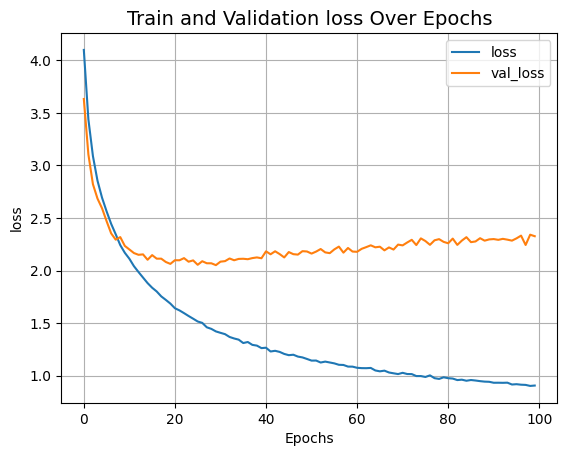

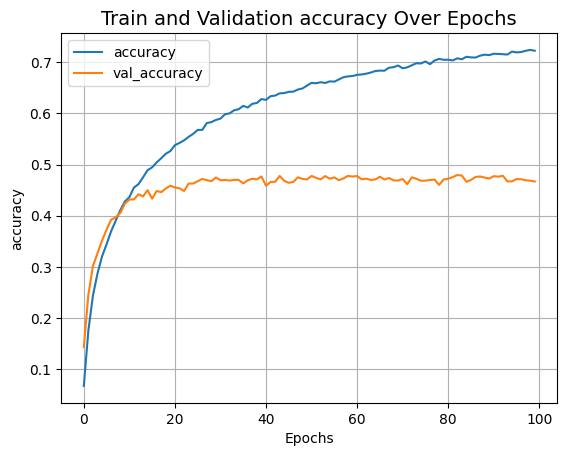

In [6]:
import matplotlib.pyplot as plt

def plot_history(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

plot_history("loss")
plot_history("accuracy")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


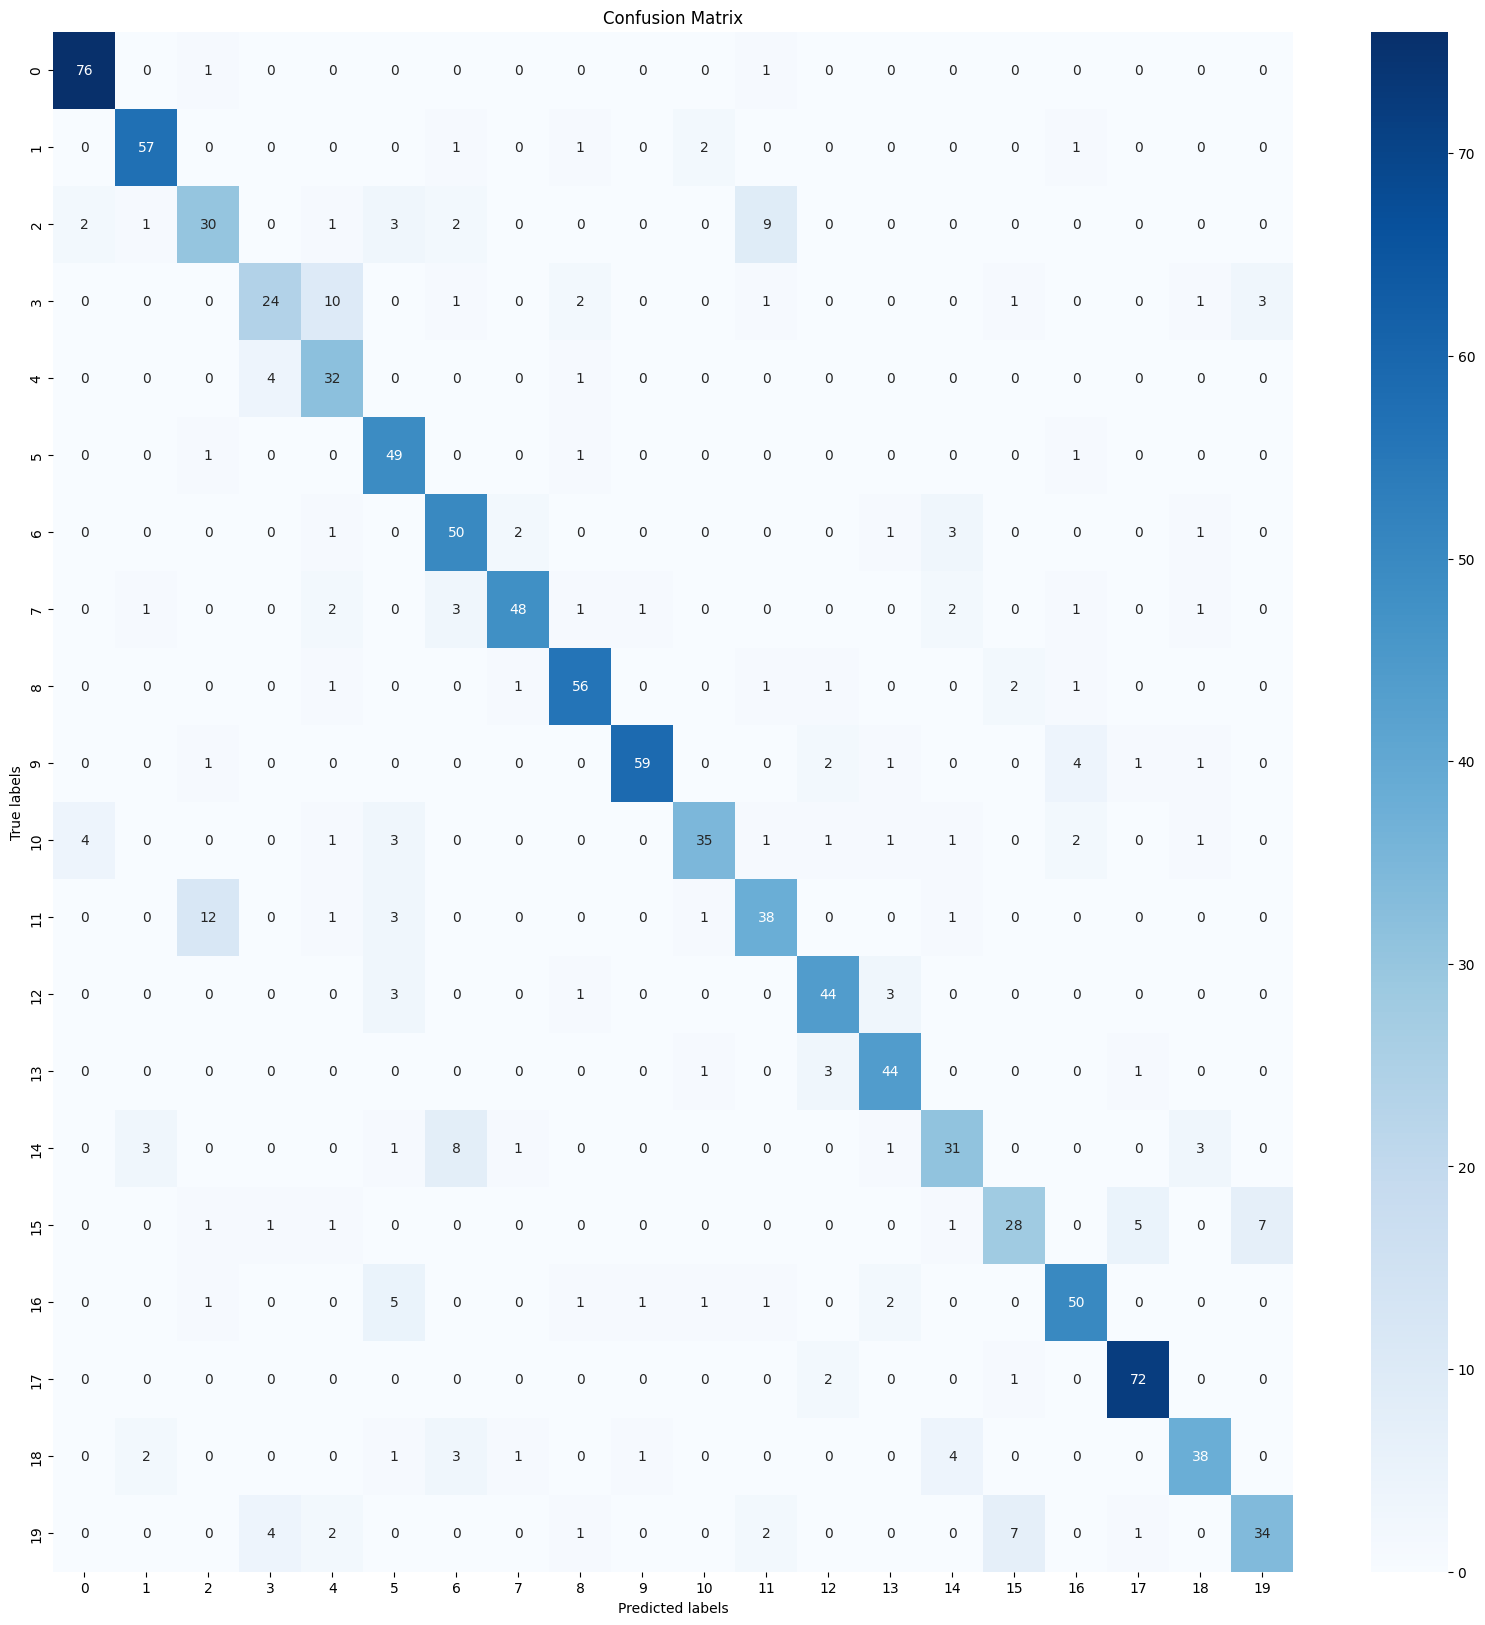

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get model predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_mat = confusion_matrix(_y_test, y_pred_classes)

# Plot confusion matrix (for the first 20 classes to keep it readable)
plt.figure(figsize=(20, 20))
sns.heatmap(conf_mat[:20, :20], annot=True, fmt='d', cmap='Blues',
            xticklabels=range(20), yticklabels=range(20))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [8]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)
# Detailed classification report
print("\nClassification Report:")
print(classification_report(_y_test, y_pred_classes))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(_y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       100
           1       0.60      0.57      0.58       100
           2       0.32      0.30      0.31       100
           3       0.28      0.24      0.26       100
           4       0.25      0.32      0.28       100
           5       0.36      0.49      0.42       100
           6       0.46      0.50      0.48       100
           7       0.67      0.48      0.56       100
           8       0.56      0.56      0.56       100
           9       0.71      0.59      0.64       100
          10       0.42      0.35      0.38       100
          11       0.33      0.38      0.35       100
          12       0.45      0.44      0.45       100
          13       0.43      0.44      0.44       100
          14       0.52      0.31      0.39       100
          15       0.41      0.28      0.33       100
          16       0.48      0.50      0.49       100
   